In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [42]:
import sys
import os

# Add the project root to sys.path (adjust the path as needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
sys.path.append(project_root)

# Now try to import the DataIngestion class
from src.components.data_ingestion import DataIngestion

# Initialize the DataIngestion object
ingestion = DataIngestion()

# Load data from the database
df_drivers = ingestion.load_dataframe('drivers_table')

# Display the data
print(df_drivers.head())

Connected to database: postgres
    driver_id               name gender  age  experience driving_style  \
0  d9f30553-6       Daniel Marks   male   47           5     proactive   
1  82de7bb8-2      Clifford Carr   male   47          14     proactive   
2  7e789842-4  Terry Faulkner MD   male   41           9  conservative   
3  b2555587-8     Brendan Jacobs   male   44          10     proactive   
4  b2e58421-d      Vincent Davis   male   41          10     proactive   

   ratings  vehicle_no  average_speed_mph  
0        7    42302347              62.22  
1        4    27867488              60.89  
2        2    13927774              53.67  
3        2    69577118              59.82  
4        7    28650047              62.65  


In [43]:
# path1=r"C:\Truck_Delay_Classification\Data\raw_data\training_data\drivers_table.csv"
# df=pd.read_csv(path1)
# df

Data Description

In [44]:
df.shape

(1300, 9)

In [45]:
df.info

<bound method DataFrame.info of        driver_id               name gender  age  experience driving_style  \
0     d9f30553-6       Daniel Marks   male   47           5     proactive   
1     82de7bb8-2      Clifford Carr   male   47          14     proactive   
2     7e789842-4  Terry Faulkner MD   male   41           9  conservative   
3     b2555587-8     Brendan Jacobs   male   44          10     proactive   
4     b2e58421-d      Vincent Davis   male   41          10     proactive   
...          ...                ...    ...  ...         ...           ...   
1295  57f77e99-8     Robert Johnson   male   60          26     proactive   
1296  e64c4059-8  Patrick Hernandez   male   46          20     proactive   
1297  7e6a0cf5-1      Richard Ortiz   male   49          10  conservative   
1298  c4a966b0-b    Peter Rodriguez   male   49           5  conservative   
1299  e5d104b5-1   Michael Robinson   male   56          24     proactive   

      ratings  vehicle_no  average_speed_mp

In [46]:
df.describe

<bound method NDFrame.describe of        driver_id               name gender  age  experience driving_style  \
0     d9f30553-6       Daniel Marks   male   47           5     proactive   
1     82de7bb8-2      Clifford Carr   male   47          14     proactive   
2     7e789842-4  Terry Faulkner MD   male   41           9  conservative   
3     b2555587-8     Brendan Jacobs   male   44          10     proactive   
4     b2e58421-d      Vincent Davis   male   41          10     proactive   
...          ...                ...    ...  ...         ...           ...   
1295  57f77e99-8     Robert Johnson   male   60          26     proactive   
1296  e64c4059-8  Patrick Hernandez   male   46          20     proactive   
1297  7e6a0cf5-1      Richard Ortiz   male   49          10  conservative   
1298  c4a966b0-b    Peter Rodriguez   male   49           5  conservative   
1299  e5d104b5-1   Michael Robinson   male   56          24     proactive   

      ratings  vehicle_no  average_speed_

#Step 2: Handling the missing data

In [47]:
print(df.isnull().sum())

driver_id            0
name                 0
gender               0
age                  0
experience           0
driving_style        0
ratings              0
vehicle_no           0
average_speed_mph    0
dtype: int64


In [48]:
df.fillna(method='ffill', inplace=True)


2024-09-27 14:36:31,162 WARNING: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [49]:
print(df.isnull().sum())

driver_id            0
name                 0
gender               0
age                  0
experience           0
driving_style        0
ratings              0
vehicle_no           0
average_speed_mph    0
dtype: int64


Hence used the ffill method to fill the missing values

#Removing the duplicate values

In [50]:
df.duplicated().sum()

0

Hence there are no duplicate values in the dataset

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'ratings'}>,
        <Axes: title={'center': 'vehicle_no'}>],
       [<Axes: title={'center': 'average_speed_mph'}>, <Axes: >]],
      dtype=object)

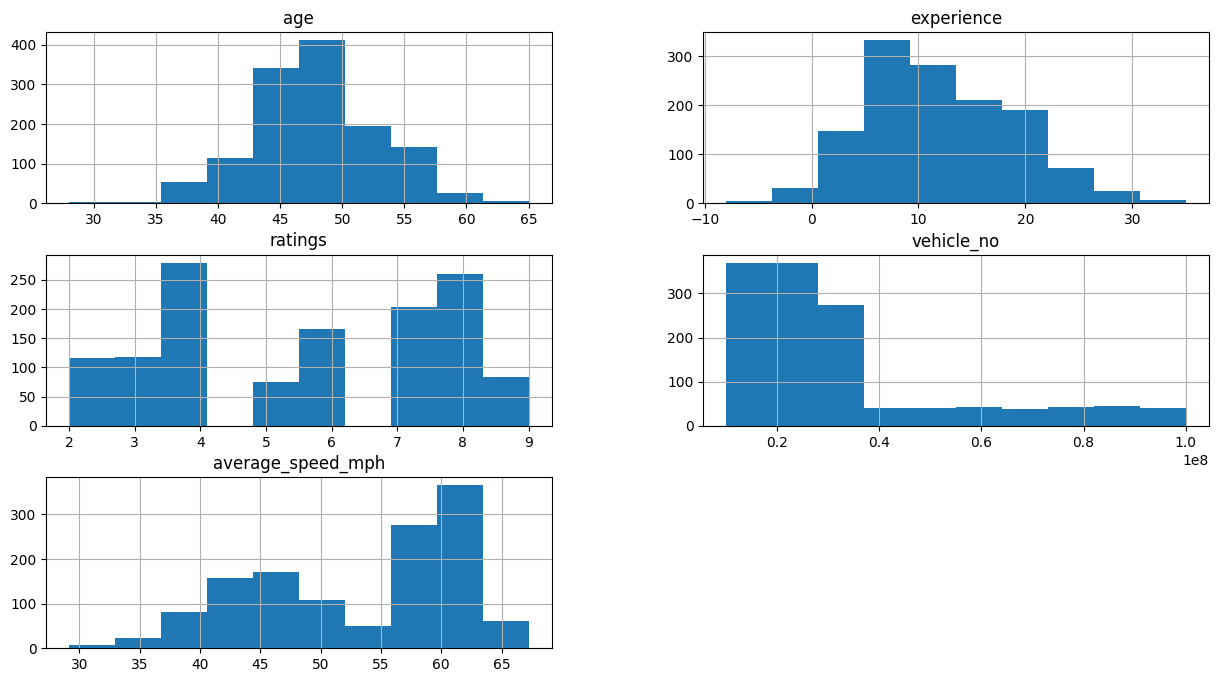

In [51]:
#Understanding the data
df.hist(figsize=(15,8))

In [52]:
df.head()

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89
2,7e789842-4,Terry Faulkner MD,male,41,9,conservative,2,13927774,53.67
3,b2555587-8,Brendan Jacobs,male,44,10,proactive,2,69577118,59.82
4,b2e58421-d,Vincent Davis,male,41,10,proactive,7,28650047,62.65


In [53]:
df.columns

Index(['driver_id', 'name', 'gender', 'age', 'experience', 'driving_style',
       'ratings', 'vehicle_no', 'average_speed_mph'],
      dtype='object')

In [54]:
df.shape

(1300, 9)

In [55]:
df['name'].value_counts().count()

1274

In [56]:
df['name'].duplicated().any()


True

In [57]:
duplicates_in_column = df[df['name'].duplicated(keep=False)]
duplicates_in_column

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
4,b2e58421-d,Vincent Davis,male,41,10,proactive,7,28650047,62.65
15,2f2e8d57-9,Joshua Martinez,male,46,9,conservative,3,27799951,38.87
32,0fc4a002-7,Andrew Williams,male,51,18,proactive,6,21001184,60.21
77,1613697d-4,Joshua Martinez,male,46,16,proactive,7,31889845,59.85
101,a17d5cbf-7,Kenneth Johnson,male,50,7,proactive,8,31312028,62.11
130,9cb46965-d,Michael Smith,male,44,17,proactive,4,22705355,64.42
202,641f9f43-7,Joseph Lopez,male,45,2,conservative,2,77969688,46.12
214,effe4a4d-0,Michael Jacobs,male,47,10,proactive,8,18882093,61.46
253,fa8b479d-1,Michael Jones,male,49,6,proactive,8,25314663,56.34
276,11ecb456-e,Michael Jones,male,45,11,conservative,4,32255566,35.32


Hence though we have the duplicate names here, we still have the other attributes different for same name people. Hence we can ignore this.

In [58]:
df['age'].value_counts().count()

36

In [59]:
df['age'].value_counts()

age
47    117
49    109
45    103
46    103
48     93
50     92
51     84
43     68
44     67
52     65
42     54
54     53
53     47
55     42
41     40
56     27
39     23
40     21
57     21
38     17
37     12
58     11
59      7
60      5
61      4
62      3
36      3
65      1
32      1
28      1
30      1
64      1
34      1
29      1
33      1
35      1
Name: count, dtype: int64

<Axes: ylabel='age'>

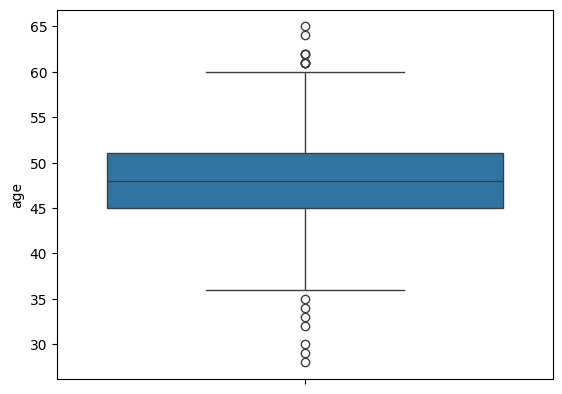

In [60]:
sns.boxplot(y=df['age'])

Hence we cannot apply this column for outliers

In [61]:
df['experience'].value_counts()

experience
 11    74
 7     72
 12    71
 10    71
 9     68
 6     67
 5     67
 13    65
 14    65
 4     61
 8     58
 16    52
 18    49
 15    48
 17    45
 19    39
 20    38
 3     36
 21    33
 2     31
 22    31
 24    26
 0     24
 1     19
 23    18
 25    16
 26    13
 27     9
 28     7
 29     5
 30     4
-2      3
 31     3
 32     2
-3      2
-5      2
-1      2
 35     1
-7      1
-4      1
-8      1
Name: count, dtype: int64

In [62]:
df['experience'].value_counts().count()

41

In [63]:
#Hence here there are values in negative and we can apply this column for outliers

In [64]:
df['gender'].value_counts()

gender
male      1221
female      79
Name: count, dtype: int64

Hence no need to remove outliers as they are segregated in two columns

In [65]:
df['ratings'].value_counts().count()

8

In [66]:
df['ratings'].value_counts()

ratings
4    279
8    260
7    203
6    165
3    118
2    116
9     84
5     75
Name: count, dtype: int64

Hence no need to take outliers

In [67]:
df['vehicle_no'].value_counts().count()

1300

In [68]:
df['vehicle_no'].value_counts()

vehicle_no
42302347    1
25812199    1
30440990    1
56671924    1
24891855    1
           ..
22458296    1
28973978    1
27775623    1
12642421    1
34755903    1
Name: count, Length: 1300, dtype: int64

<Axes: ylabel='vehicle_no'>

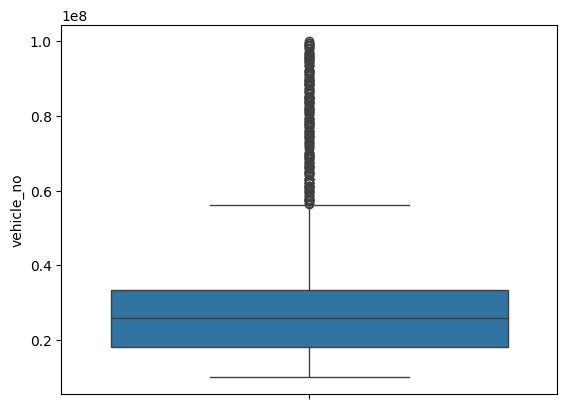

In [69]:
sns.boxplot(y=df['vehicle_no'])

Hence no need to take the outliers for this column 

Removing outliers for selected columns

In [70]:
# Columns from where outliers need to be removed
columns_to_check = ['experience','vehicle_no']

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)  # 25th percentile (1st Quartile)
        Q3 = df_cleaned[column].quantile(0.75)  # 75th percentile (3rd Quartile)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# Display the cleaned DataFrame
print(df_cleaned)

       driver_id               name gender  age  experience driving_style  \
0     d9f30553-6       Daniel Marks   male   47           5     proactive   
1     82de7bb8-2      Clifford Carr   male   47          14     proactive   
2     7e789842-4  Terry Faulkner MD   male   41           9  conservative   
4     b2e58421-d      Vincent Davis   male   41          10     proactive   
5     6ef125cc-7  Alexander Wheeler   male   49          10     proactive   
...          ...                ...    ...  ...         ...           ...   
1295  57f77e99-8     Robert Johnson   male   60          26     proactive   
1296  e64c4059-8  Patrick Hernandez   male   46          20     proactive   
1297  7e6a0cf5-1      Richard Ortiz   male   49          10  conservative   
1298  c4a966b0-b    Peter Rodriguez   male   49           5  conservative   
1299  e5d104b5-1   Michael Robinson   male   56          24     proactive   

      ratings  vehicle_no  average_speed_mph  
0           7    42302347   

In [71]:
# Adding a new index column with a different name
df_cleaned.insert(0, 'RowIndex', range(1, 1 + len(df_cleaned)))

# Display the DataFrame with the new index column
print(df_cleaned)

      RowIndex   driver_id               name gender  age  experience  \
0            1  d9f30553-6       Daniel Marks   male   47           5   
1            2  82de7bb8-2      Clifford Carr   male   47          14   
2            3  7e789842-4  Terry Faulkner MD   male   41           9   
4            4  b2e58421-d      Vincent Davis   male   41          10   
5            5  6ef125cc-7  Alexander Wheeler   male   49          10   
...        ...         ...                ...    ...  ...         ...   
1295      1095  57f77e99-8     Robert Johnson   male   60          26   
1296      1096  e64c4059-8  Patrick Hernandez   male   46          20   
1297      1097  7e6a0cf5-1      Richard Ortiz   male   49          10   
1298      1098  c4a966b0-b    Peter Rodriguez   male   49           5   
1299      1099  e5d104b5-1   Michael Robinson   male   56          24   

     driving_style  ratings  vehicle_no  average_speed_mph  
0        proactive        7    42302347              62.22  
1

In [72]:
df2 = df_cleaned 

In [73]:
df2['event_time']= pd.to_datetime('2024-09-17')

In [74]:
# Define the function to replace negative values with the mean of non-negative values
def fix_negative_values(df2, experience):
    # Calculate the mean of non-negative values
    mean_value = df2[df2[experience] >= 0][experience].mean()
    
    # Replace negative values with the mean
    df2[experience] = df2[experience].apply(lambda x: mean_value if x < 0 else x)
    
    return df2

# Apply the function to fix the 'experience' column
df2 = fix_negative_values(df2, 'experience')

# Display the updated DataFrame
print(df2)

      RowIndex   driver_id               name gender  age  experience  \
0            1  d9f30553-6       Daniel Marks   male   47         5.0   
1            2  82de7bb8-2      Clifford Carr   male   47        14.0   
2            3  7e789842-4  Terry Faulkner MD   male   41         9.0   
4            4  b2e58421-d      Vincent Davis   male   41        10.0   
5            5  6ef125cc-7  Alexander Wheeler   male   49        10.0   
...        ...         ...                ...    ...  ...         ...   
1295      1095  57f77e99-8     Robert Johnson   male   60        26.0   
1296      1096  e64c4059-8  Patrick Hernandez   male   46        20.0   
1297      1097  7e6a0cf5-1      Richard Ortiz   male   49        10.0   
1298      1098  c4a966b0-b    Peter Rodriguez   male   49         5.0   
1299      1099  e5d104b5-1   Michael Robinson   male   56        24.0   

     driving_style  ratings  vehicle_no  average_speed_mph event_time  
0        proactive        7    42302347            

In [75]:
!pip install hopsworks


In [76]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043610
Connected. Call `.close()` to terminate connection gracefully.


In [77]:
drivers_table_fg = fs.get_or_create_feature_group(
    name="drivers_table",
    version=1,
    description="drivers_table",
    online_enabled=True,
    primary_key=['RowIndex'],
    event_time='event_time',
    
)

In [78]:
drivers_table_fg.insert(df2)

2024-09-27 14:36:45,100 WARNING: FeatureGroupWarning: The ingested dataframe contains upper case letters in feature names: `['RowIndex']`. Feature names are sanitized to lower case in the feature store.

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1043610/fs/1035337/fg/1225052


Uploading Dataframe: 0.00% |          | Rows 0/1099 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: drivers_table_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/1043610/jobs/named/drivers_table_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x1e18d8079b0>, None)

In [79]:
# df2.to_csv('df2.csv', index=False)

In [80]:
pip install hopsworks

Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install hsfs

In [82]:
import hsfs

# Set up your API key for Hopsworks
api_key = "dRzrIhSDhpZjLQCd.ZLlcViwwQqM7IDTQwTVfaJqrxxS4vqCjGIVMrysEcmFocLbAuMHTAXbF0ona7QzB"

# Set your project name
project_name = "Your_Project_Name"  # Replace with your project name

# Initialize connection to Hopsworks
connection = hsfs.connection(
    host="c.app.hopsworks.ai",  # Hopsworks host
    port=443,                   # Default port for Hopsworks
    project=project_name,        # Your Hopsworks project name
    api_key_value=api_key,       # Your API key
    hostname_verification=False  # Optional: Turn off SSL verification
)

# Get the feature store for your project
fs = connection.get_feature_store()

# Print the feature store details
print(f"Feature Store Name: {fs.name}")


Connected. Call `.close()` to terminate connection gracefully.
Feature Store Name: truckdelays_pipelines_featurestore


In [83]:
# Corrected code to read the feature group using Hive
import hopsworks

# Initialize connection to Hopsworks
connection = hopsworks.login(
    api_key_value="dRzrIhSDhpZjLQCd.ZLlcViwwQqM7IDTQwTVfaJqrxxS4vqCjGIVMrysEcmFocLbAuMHTAXbF0ona7QzB"
)

# Get feature store
fs = connection.get_feature_store()

# Get the feature group
feature_group = fs.get_feature_group(name="city_weather", version=1)

# Load the feature group into a pandas DataFrame using Hive
df = feature_group.read(read_options={"use_hive": True})

# Print the DataFrame to verify the data
print(df)


Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043610
Connected. Call `.close()` to terminate connection gracefully.
2024-09-27 14:39:50,112 WARNING: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated

Finished: Reading data from Hopsworks, using Hive (7.20s) 
       rowindex     city_id  temp  wind_speed    description  precip  \
0          4592  C-451776b7    61           1          Sunny     0.0   
1         12379  C-ef47bdcd    41           4  Partly cloudy     0.0   
2          8297  C-731988ba    73           4          Sunny     0.0   
3         42087  C-d9e9d934    45           6  Partly cloudy     0.0   
4           165  C-927ceb5e    43           6  Partly cloudy     0.0   
...         ...         ...   ...         ...            ...     ...   
55171     11817  C-c7cacd1d    16          11         Cloudy     0.0   
55172     26108  C-f5ed4c15    10           2  Partly c

Plotting the histogram for the numerical columns

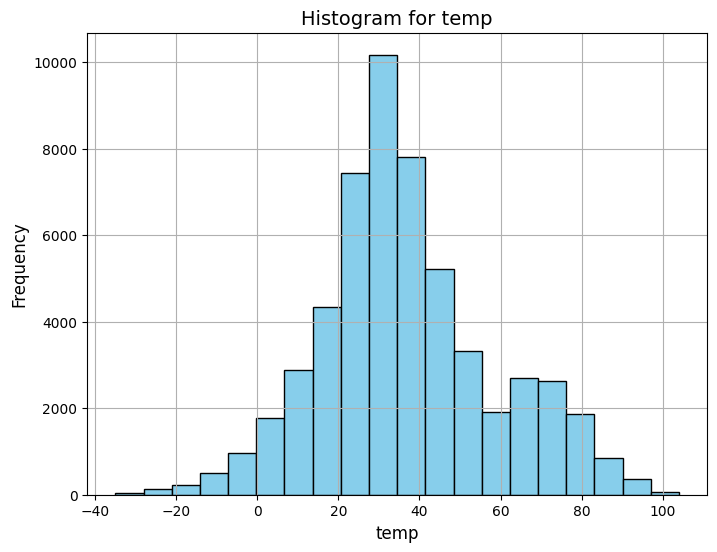

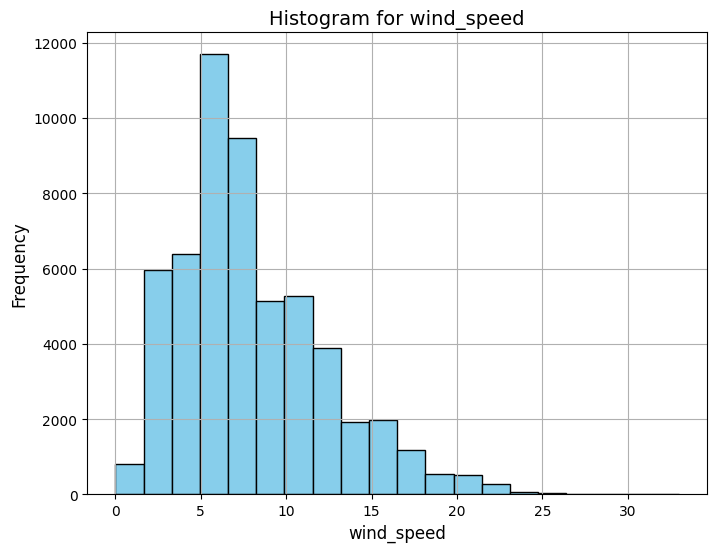

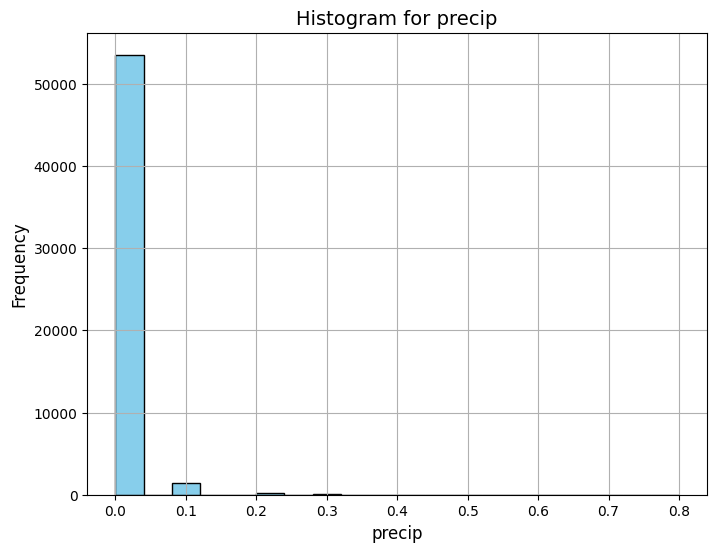

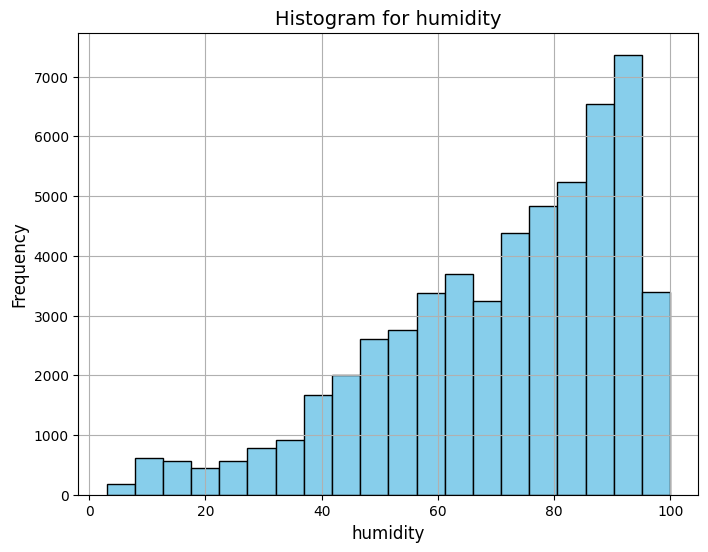

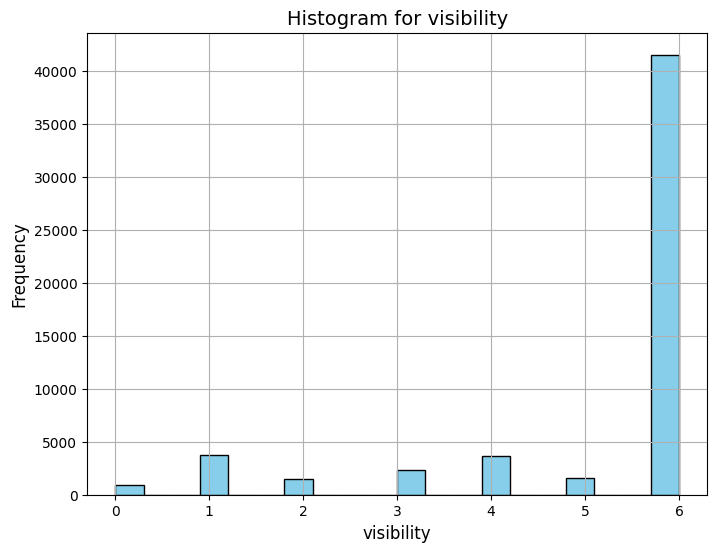

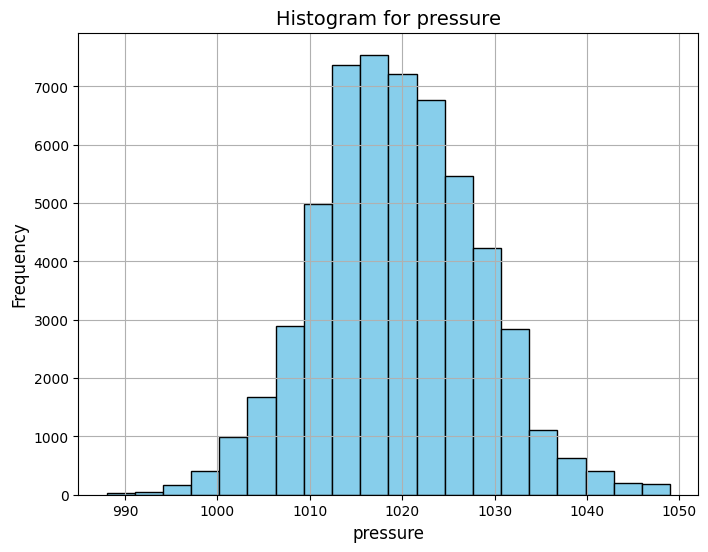

In [84]:
# List of columns for which you want to plot histograms
columns_to_plot = ['temp', 'wind_speed', 'precip','humidity','visibility','pressure']

def plot_histograms(dataframe, columns):
    """
    Function to plot histograms for specific columns in the DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to generate histograms for.
    """
    # Loop through the list of columns and generate a histogram for each
    for column in columns:
        if column in dataframe.columns:
            plt.figure(figsize=(8, 6))  # Set the figure size
            plt.hist(dataframe[column].dropna(), bins=20, color='skyblue', edgecolor='black')  # Plot the histogram
            plt.title(f'Histogram for {column}', fontsize=14)  # Set title
            plt.xlabel(column, fontsize=12)  # X-axis label
            plt.ylabel('Frequency', fontsize=12)  # Y-axis label
            plt.grid(True)  # Enable grid
            plt.show()  # Display the plot
        else:
            print(f"Column {column} does not exist in the DataFrame.")

# Call the function to plot histograms
plot_histograms(df, columns_to_plot)